# Mall Customer Segmentation

**Importing all the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [2]:
df = pd.read_csv('C:\\Users\\91701\\Downloads\\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39.0
1,2,Male,21,15,81.0
2,3,Female,20,16,6.0
3,4,Female,23,16,77.0
4,5,Female,31,17,40.0


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79.0
196,197,Female,45,126,28.0
197,198,Male,32,126,74.0
198,199,Male,32,137,18.0
199,200,Male,30,137,83.0


In [5]:
df.shape

(200, 5)

In [6]:
df.size

1000

In [7]:
df.dtypes

CustomerID                  int64
Gender                     object
Age                         int64
Annual Income (k$)          int64
Spending Score (1-100)    float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  198 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


**Statistics of data**

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,198.000000
mean,100.500000,38.850000,60.560000,50.202020
std,57.879185,13.969007,26.264721,25.953484
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.250000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Checking for null or NaN Values**

<AxesSubplot:>

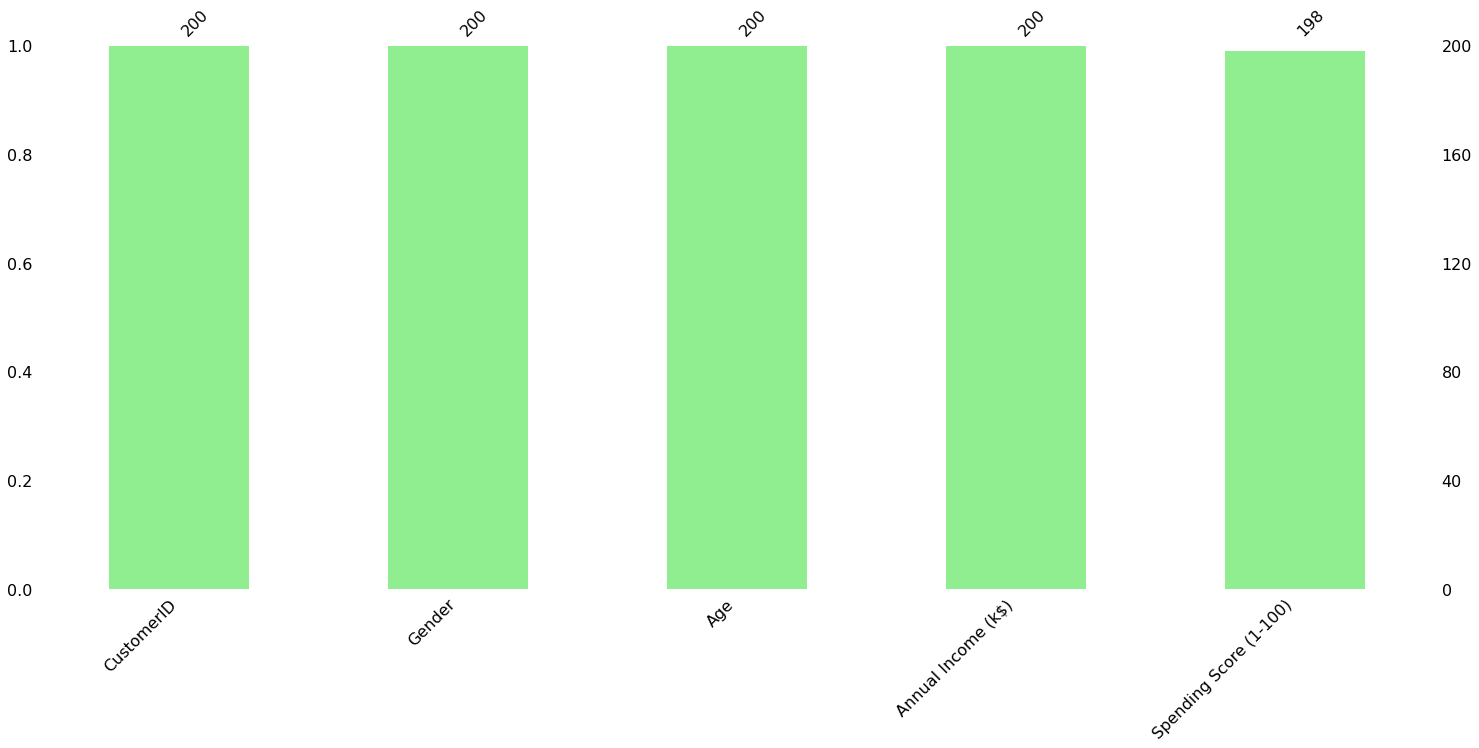

In [10]:
mns.bar(df,color='lightgreen')

In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    2
dtype: int64

In [12]:
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)     True
dtype: bool

In [13]:
df[df['Spending Score (1-100)'].isnull()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
50,51,Female,49,42,NaN
77,78,Male,40,54,NaN


In [14]:
x  = df[(df.Gender=='Female') & (df.Age==49)]['Spending Score (1-100)'].mean()

In [15]:
y = df[(df.Gender=='Male') & (df.Age==40)]['Spending Score (1-100)'].mean()

In [16]:
df.loc[50,'Spending Score (1-100)'] = x
df.loc[77, 'Spending Score (1-100)'] = y

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39.0
1,2,Male,21,15,81.0
2,3,Female,20,16,6.0
3,4,Female,23,16,77.0
4,5,Female,31,17,40.0


In [18]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79.0
196,197,Female,45,126,28.0
197,198,Male,32,126,74.0
198,199,Male,32,137,18.0
199,200,Male,30,137,83.0


In [19]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

**All the null values are removed**

**Let us convert the categorical column into numerical column**

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label = LabelEncoder()

In [23]:
df['Gender']= label.fit_transform(df['Gender'])

In [24]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39.0
1,2,1,21,15,81.0
2,3,0,20,16,6.0
3,4,0,23,16,77.0
4,5,0,31,17,40.0


**Exploratory Data Analysis**

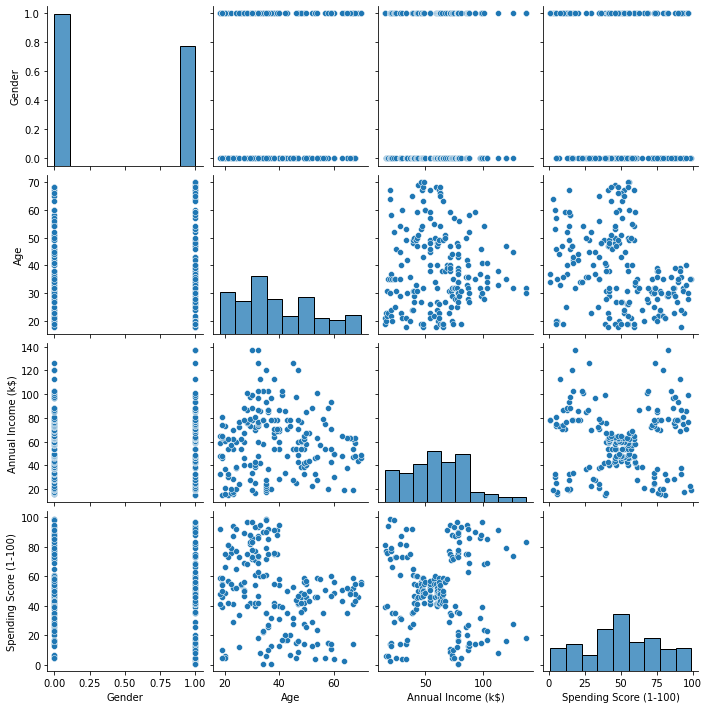

In [25]:
sns.pairplot(df.drop(columns='CustomerID'))
plt.show()

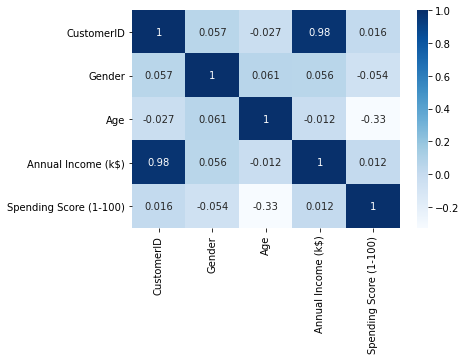

In [26]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

**Detecting Outliers**

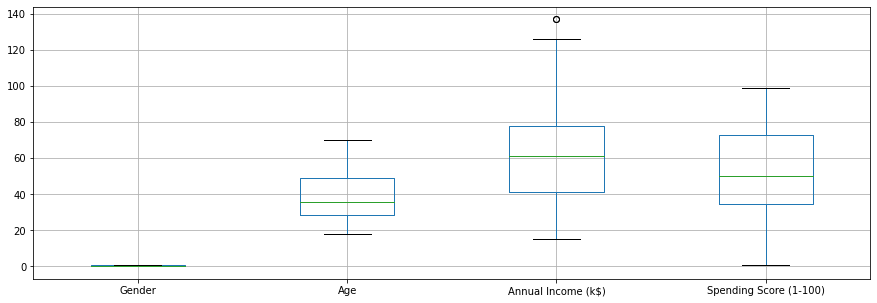

In [27]:
plt.figure(figsize=(15,5))
df.drop(columns='CustomerID').boxplot()
plt.show()

In [28]:
df['Annual Income (k$)'].quantile(0.95)

103.0

In [29]:
df = df[df['Annual Income (k$)']<103.3]

In [30]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39.0
1,2,1,21,15,81.0
2,3,0,20,16,6.0
3,4,0,23,16,77.0
4,5,0,31,17,40.0


In [31]:
df.shape

(192, 5)

In [32]:
x = df.iloc[:,[3,4]]

**Let us perform feature scaling**

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scale = MinMaxScaler()

In [35]:
x  = scale.fit_transform(x)

In [36]:
x

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.01136364, 0.05102041],
       [0.01136364, 0.7755102 ],
       [0.02272727, 0.39795918],
       [0.02272727, 0.76530612],
       [0.03409091, 0.05102041],
       [0.03409091, 0.94897959],
       [0.04545455, 0.02040816],
       [0.04545455, 0.7244898 ],
       [0.04545455, 0.13265306],
       [0.04545455, 1.        ],
       [0.05681818, 0.14285714],
       [0.05681818, 0.7755102 ],
       [0.05681818, 0.12244898],
       [0.05681818, 0.79591837],
       [0.06818182, 0.34693878],
       [0.06818182, 0.66326531],
       [0.09090909, 0.28571429],
       [0.09090909, 0.98979592],
       [0.10227273, 0.34693878],
       [0.10227273, 0.73469388],
       [0.11363636, 0.04081633],
       [0.11363636, 0.73469388],
       [0.14772727, 0.13265306],
       [0.14772727, 0.82653061],
       [0.14772727, 0.31632653],
       [0.14772727, 0.6122449 ],
       [0.15909091, 0.30612245],
       [0.15909091, 0.87755102],
       [0.

**Let us start with model building**

In [37]:
from sklearn.cluster import KMeans

**Let us start with 3 clusters**

In [38]:
km = KMeans(n_clusters=3)

In [39]:
y_predicted = km.fit_predict(x)

In [40]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [41]:
df['cluster'] = y_predicted
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
187,188,1,28,101,68.0,2
188,189,0,41,103,17.0,1
189,190,0,36,103,85.0,2
190,191,0,34,103,23.0,1
191,192,0,32,103,69.0,2


**Location of centres are**

In [42]:
print("Centroids are: ",km.cluster_centers_)

Centroids are:  [[0.32682194 0.49773992]
 [0.76363636 0.18746356]
 [0.76010101 0.82142857]]


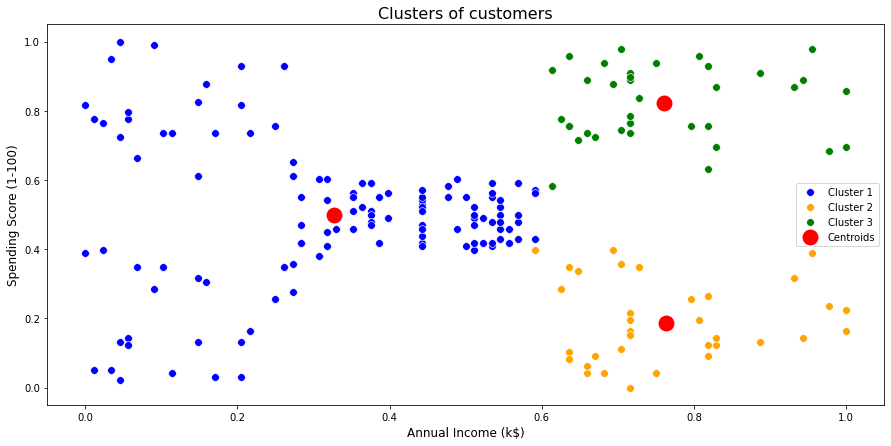

In [43]:
y = df.cluster
plt.figure(figsize=(15,7))
sns.scatterplot(x[y == 0, 0], x[y == 0, 1], color = 'blue', label = 'Cluster 1',s=60)
sns.scatterplot(x[y == 1, 0], x[y == 1, 1], color = 'orange', label = 'Cluster 2',s=60)
sns.scatterplot(x[y == 2, 0], x[y == 2, 1], color = 'green', label = 'Cluster 3',s=60)
sns.scatterplot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=300,marker='o')
plt.grid(False)
plt.title('Clusters of customers', fontsize = 16)
plt.xlabel('Annual Income (k$)', fontsize = 12)
plt.ylabel('Spending Score (1-100)', fontsize = 12)
plt.legend()
plt.show()

**Elbow plot**

In [44]:
error = []
cou = range(1,20,1)
for k in cou:
    km = KMeans(n_clusters=k)
    km.fit(x)
    error.append(km.inertia_)
    

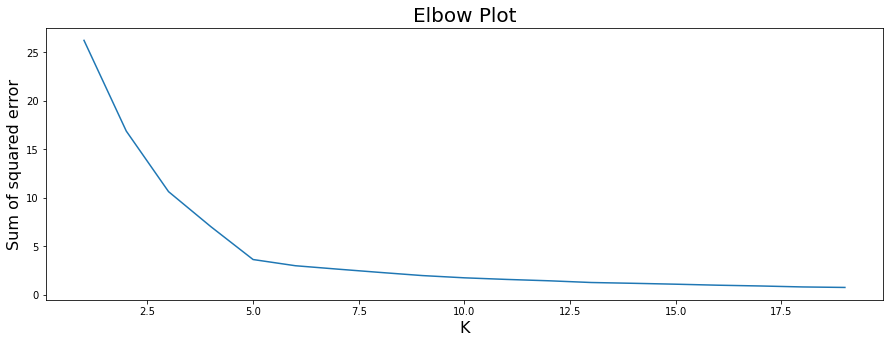

In [45]:
plt.figure(figsize = (15,5))
plt.plot(cou,error)

plt.title('Elbow Plot', fontsize = 20)
plt.xlabel('K', fontsize = 16)
plt.ylabel('Sum of squared error', fontsize = 16)

plt.show()

**From this we can say that K=5**

In [46]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(x)
df['cluster'] = y_predicted
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
187,188,1,28,101,68.0,3
188,189,0,41,103,17.0,0
189,190,0,36,103,85.0,3
190,191,0,34,103,23.0,0
191,192,0,32,103,69.0,3


In [47]:
print("Centroids are: ",km.cluster_centers_)

Centroids are:  [[0.76871658 0.18127251]
 [0.12190083 0.79962894]
 [0.45017483 0.49924123]
 [0.76428571 0.82827988]
 [0.1284585  0.20319432]]


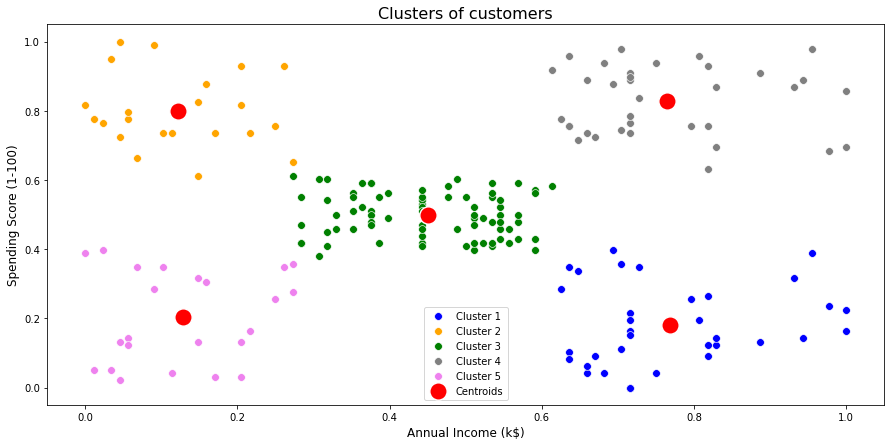

In [48]:
y = df.cluster
plt.figure(figsize=(15,7))
sns.scatterplot(x[y == 0, 0], x[y == 0, 1], color = 'blue', label = 'Cluster 1',s=60)
sns.scatterplot(x[y == 1, 0], x[y == 1, 1], color = 'orange', label = 'Cluster 2',s=60)
sns.scatterplot(x[y == 2, 0], x[y == 2, 1], color = 'green', label = 'Cluster 3',s=60)
sns.scatterplot(x[y == 3, 0], x[y == 3, 1], color = 'grey', label = 'Cluster 4',s=60)
sns.scatterplot(x[y == 4, 0], x[y == 4, 1], color = 'violet', label = 'Cluster 5',s=60)
sns.scatterplot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=300,marker='o')
plt.grid(False)
plt.title('Clusters of customers', fontsize = 16)
plt.xlabel('Annual Income (k$)', fontsize = 12)
plt.ylabel('Spending Score (1-100)', fontsize = 12)
plt.legend()
plt.show()


**Here we can see that there is correctly clustered the data**